# Homework 6: Confidence Intervals, the Normal Distribution, and the Central Limit Theorem

## Due Tuesday, May 30th at 11:59PM

Welcome to Homework 6, the last homework of the quarter! This week, we will cover confidence intervals, the normal distribution, and the Central Limit Theorem. You can find additional help on these topics in the following readings:

* [CIT 13.3](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html): Confidence Intervals
* [CIT 13.4](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html): Using Confidence Intervals
* [CIT 14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html): Variability, Standard Deviation, Standard Units, Chebyshev's Bounds
* [CIT 14.3](https://www.inferentialthinking.com/chapters/14/3/SD_and_the_Normal_Curve.html): The Standard Deviation (SD) and the Normal Curve 
* [CIT 14.4](https://www.inferentialthinking.com/chapters/14/4/Central_Limit_Theorem.html): The Central Limit Theorem
* [CIT 14.5](https://www.inferentialthinking.com/chapters/14/5/Variability_of_the_Sample_Mean.html): The Variability of the Sample Mean
* [CIT 14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html): Choosing a Sample Size

### Instructions

You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or Ed. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

In [1]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import otter
grader = otter.Notebook()

import warnings
warnings.simplefilter('ignore')

from IPython.display import IFrame
def show_clt_slides():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000&rm=minimal"
    width = 700
    height = 370
    display(IFrame(src, width, height))

## 1. Hotels in Europe ✈️⛱️

Summer break is right around the corner and you and your friends want to go to Europe! You have been considering four cities to visit: Sarajevo (in Bosnia and Herzegovina), Zagreb (in Croatia), Belgrade (in Serbia), and Ljubljana (in Slovenia). Sadly, as college students, you have a limited budget and only want to spend one week, so it might be too short to visit all four cities.  To maximize your trip you are wondering which city has the cheapest hotels.

For the four cities above, you gathered hotel data from [Booking.com](https://www.booking.com/), an online booking website for travel. The DataFrame `hotels` below contains a **sample** of all the hotels in the four cities above. Each row corresponds to a particular hotel. We have information on the `'Hotel name'`, the `'City'`, the `'Price(BAM)'` for a one night stay (in the currency of Bosnia and Herzegovina), the `'Hotel star rating'` from 1 to 5, and the `'Customer rating'` from 1 to 10 . Now it’s time to analyze the price and rating of hotels for each city!

In [2]:
hotels = bpd.read_csv('data/hotels.csv')
hotels

,Hotel name,City,Price(BAM),Hotel star rating,Customer rating
0,Academia,Zagreb,190,4,8.9
1,Adora Hotel,Ljubljana,120,3,9.0
2,Allegro Hotel,Ljubljana,106,4,8.5
3,Atelier Hotel,Ljubljana,100,3,8.9
4,Austria Trend Hotel,Ljubljana,137,4,8.8
...,...,...,...,...,...
69,Viena,Zagreb,164,3,8.0
70,WUD Hotel,Ljubljana,121,3,8.9
71,Zagreb,Zagreb,158,2,6.9
72,intercontinental,Ljubljana,241,5,9.0


**Question 1.1.** Let's start by determining the mean price for each city. Create a DataFrame called `city_means`, indexed by `'City'`, with one column called `'Price(BAM)'` that contains the mean price for that city, in the original currency. Sort `city_means` in descending order of `'Price(BAM)'`.

In [3]:
x = hotels.groupby("City").mean().sort_values('Price(BAM)', ascending = False)
x

,Price(BAM),Hotel star rating,Customer rating
City,,,
Zagreb,188.466667,3.466667,8.540000
Ljubljana,173.136364,3.545455,8.809091
Belgrade,172.318182,3.863636,8.950000
Sarajevo,167.800000,3.733333,8.366667


In [4]:
grader.check("q1_1")

q1_1 results:
    q1_1 - 1 result:
        Trying:
            isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 0
        Failed example:
            isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 0[0]>", line 1, in <module>
                isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
            NameError: name 'city_means' is not defined

In [5]:
# MAy 28 = 1:49 RAZI
# MAy 27 = 1:34 RAZI
# May 26 = 27 RAZI, 2:57 ACA
# MAy 25 = 10 RAZI
# May 24 = 1:43 RAZI, 1:39 ACA
# May 23 = 10 RAZI, 2:42 ACA
# May 22 = 3:06 RAZI, 4:22 ACA

RAZI = (60+49+60+34+27+10+60+43+10+180+6)
ACA = (120 + 57 + 60 + 39 + 120 + 42 + 240 + 22)

print(RAZI)
print(ACA)

print(RAZI/60)
print(ACA/60)

print((RAZI/60)/7)
print((ACA/60)/7)








539
700
8.983333333333333
11.666666666666666
1.2833333333333332
1.6666666666666665


**Question 1.2.** One of your friends mentions they really want to go to Zagreb, being that it is the homeland of the necktie! However, Zagreb seems to have the most expensive hotels based on the data we have access to. With that said, the data we have access to is only a sample of all hotels in four cities, and thus the mean price for Zagreb that we computed above is only a sample statistic, not a population parameter.

Produce 1,000 bootstrapped estimates for the mean price of **all** hotels in the city of Zagreb. Store the estimates in the `zagreb_averages` array. Then, use the `zagreb_averages` array to calculate an approximate 99% confidence interval for the true mean price. Assign the endpoints of your interval to `lower_bound` and `upper_bound`. 

In [6]:
# for sampling always do for and then sample
# also always turn into array later
# you can sample dataframes and then get the specfic aspect

'A 99% confidence interval for average hotel price in Zagreb is [160.39533333333333, 218.46733333333333]'

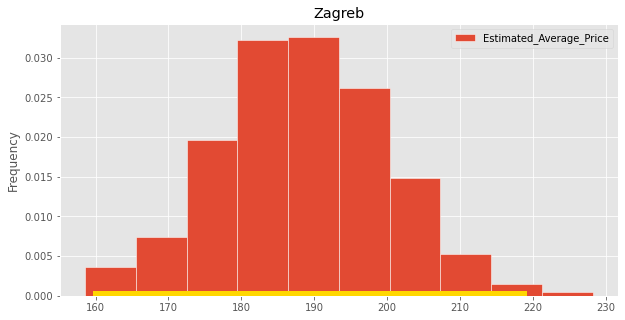

In [7]:
zagreb = hotels[hotels.get('City') == "Zagreb"]

zagreb_averages = []

for i in range(1000):
    bootstrap = zagreb.sample(zagreb.shape[0], replace = True)
    zagreb_averages.append(bootstrap.get('Price(BAM)').mean())
    
zagreb_averages = np.array(zagreb_averages)

lower_bound = np.percentile(zagreb_averages, 0.5)
upper_bound = np.percentile(zagreb_averages, 99.5)

# Display the estimates in a histogram.
bpd.DataFrame().assign(Estimated_Average_Price=zagreb_averages).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title="Zagreb");
plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');

# Don't change the line below (though you will need to copy and change it in 1.3).
city_name = 'Zagreb'
f'A 99% confidence interval for average hotel price in {city_name} is [{lower_bound}, {upper_bound}]'

In [8]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** You want to create the same histogram above for the other three cities, and also calculate the corresponding confidence intervals, but repeating the process above three more times would be redundant. Let's try to generalize what we did in Question 1.2 to work for any city! 

Create a function called `ci_and_hist`, which takes in a city name as a string, and:
1. **Plots the histogram** of 1,000 bootstrapped estimates for the city's mean hotel price.
2. **Returns** a string describing the approximate 99% confidence interval for the city's mean hotel price, formatted in the same way as the string displayed for Zagreb in Question 1.2. 

*Notes*: 
- Make sure your function both plots a histogram and **returns** a string. For example, `ci_and_hist('Ljubljana')` should return a string that starts with `'A 99% confidence interval for average hotel price in Ljubljana is'`.
- The string displayed at the end of 1.2 was created using a feature of Python called f-strings. You'll need to copy and change that f-string expression. Read [this article](https://realpython.com/python-f-strings/#simple-syntax) for more details about f-strings if you're interested.

A 99% confidence interval for average hotel price in Ljubljana is [160.39533333333333, 218.46733333333333]
A 99% confidence interval for average hotel price in Sarajevo is [160.39533333333333, 218.46733333333333]


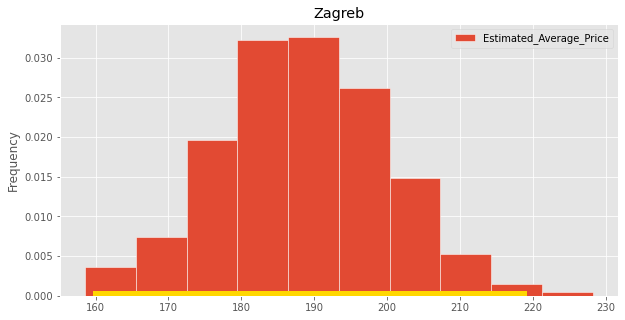

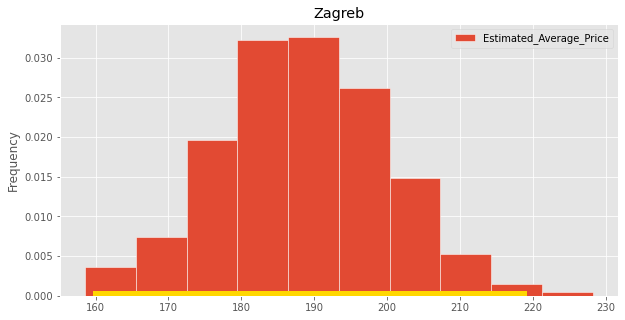

In [9]:
def ci_and_hist(city_name):
    city = hotels[hotels.get('City') == city_name]
    city_averages = []
    for i in city:
        boot = city.sample(city.shape[0], replace = True)
        city_averages.append(boot.get('Price(BAM)').mean())
    city_averages = np.array(city_averages)
    
    lower_bound = np.percentile(zagreb_averages, 0.5)
    upper_bound = np.percentile(zagreb_averages, 99.5)
    
    bpd.DataFrame().assign(Estimated_Average_Price=zagreb_averages).plot(kind='hist', density=True, ec='w', figsize=(10, 5), title="Zagreb");
    plt.plot([lower_bound, upper_bound], [0, 0], color='gold', linewidth=10, label='99% confidence interval');

    return (f'A 99% confidence interval for average hotel price in {city_name} is [{lower_bound}, {upper_bound}]')
    
    
# Example calls to the function. Don't change the lines below.
ljubljana_string = ci_and_hist('Ljubljana')
print(ljubljana_string)
sarajevo_string = ci_and_hist('Sarajevo')
print(sarajevo_string)

In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4.** One of your travel companions claims that hotels in Belgrade are more expensive than our sample of data suggests. In our sample, the mean price for hotels in Belgrade is about 172 BAM. She claims that since our price data is only a sample of the full population of hotels, the actual mean price of Belgrade hotels could be 200 BAM. You decide to perform a hypothesis test for the following pair of hypotheses:

- **Null Hypothesis**: The mean price of hotels in Belgrade is 200 BAM.
- **Alternative Hypothesis**: The mean price of hotels in Belgrade is not 200 BAM.

Run the cell below to use the `ci_and_hist` function you defined above to calculate an approximate 99% confidence interval for the mean price of the `'Belgrade'` city. 

'A 99% confidence interval for average hotel price in Belgrade is [160.39533333333333, 218.46733333333333]'

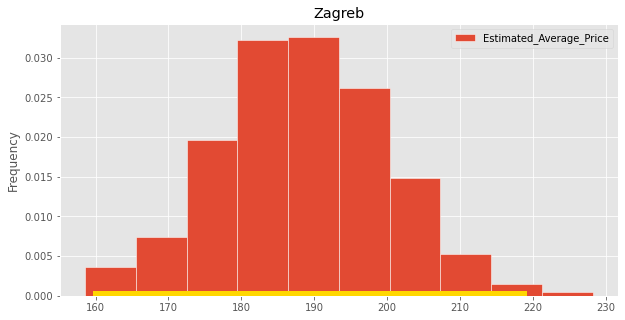

In [11]:
ci_and_hist('Belgrade') 

Do you reject the null hypothesis at a 0.01 p-value cutoff? Assign 1, 2, 3, or 4 to `q1_4`.
1. No, because the confidence interval includes 200.
1. No, because the confidence interval doesn't include 200.
1. Yes, because the confidence interval includes 200.
1. Yes, because the confidence interval doesn't include 200.

In [12]:
q1_4 = 1

In [13]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## 2. Testing the Central Limit Theorem: Coin Flips and Airbnb Prices 🛏️


The Central Limit Theorem tells us that the probability distribution of the sum or mean of a large random sample drawn with replacement is roughly normal, *regardless of the distribution of the population from which the sample is drawn*.

That's a pretty big claim, but the theorem doesn't stop there. It further states that, if we're using the mean as our statistic, the standard deviation of this normal distribution is given by $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

 In other words, suppose we start with *any distribution* that has standard deviation $\sigma$, take a sample of size $n$ (where $n$ is a large number) from that distribution with replacement, and compute the mean of that sample. If we repeat this procedure many times, then those sample means will have a normal distribution with standard deviation $\frac{\sigma}{\sqrt{n}}$.

That's an even bigger claim than the first one! The proof of the theorem is beyond the scope of this class, but we've seen examples in lecture of this formula in action, such as when we looked at flight delay data.

Run the cell below to see a short presentation that describes the CLT at a high level.

In [14]:
show_clt_slides()

In this exercise, we will be exploring some new data to see the CLT in action.

**Question 2.1.** The CLT only applies when sample sizes are "sufficiently large." This isn't a very precise statement. Is 10 large?  How about 50?  The truth is that it depends both on the original population distribution and just how "normal" you want the result to look. Let's use a simulation to get a feel for how the distribution of the sample mean changes as the sample size increases.

Consider a coin flip. If we say heads is $1$ and tails is $0$, then there's a 50% chance of getting a $1$ and a 50% chance of getting a $0$, which is definitely not a normal distribution.  The mean of these $1$s and $0$s for several coin tosses is equal to the proportion of heads in those coin tosses, so the CLT should apply if we compute the sample proportion of heads many times.

Write a function called `simulate_sample_n` that takes in a sample size `n`. It should repeat, 5000 times, the process of:
- simulating `n` flips of a fair coin, and
- counting the proportion of flips that were heads.

`simulate_sample_n` should return an array that contains 5000 sample proportions, using the process outlined above.

In [15]:
# alwasy do for loop and then random if there is a set outcome, 
# multinomial if there are varied chances and sample if somth else

# make sure to find the mean as well

In [16]:
def simulate_sample_n(n):
    proportions = []
    for i in range(5000):
        prop = np.random.choice([0,1], n)
        proportions.append(prop.mean())
    return np.array(proportions)

simulate_sample_n(5)

array([0.2, 0.6, 0.6, ..., 0.2, 0.6, 0. ])

In [17]:
grader.check("q2_1")

q2_1 results: All test cases passed!

The code below will use the function you just defined to plot the empirical distribution of the sample mean for several different sample sizes. We saw something similar in [Lecture 22](https://dsc10.com/resources/lectures/lec22/lec22.html#Changing-the-sample-size).

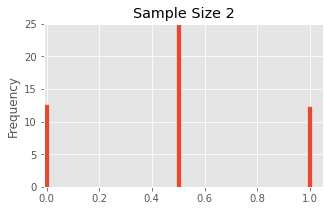

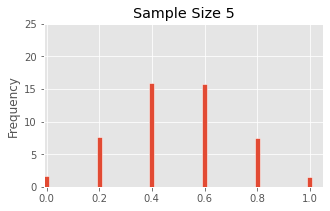

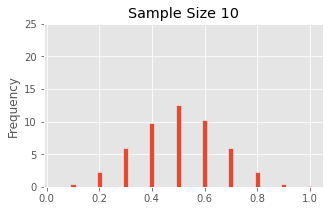

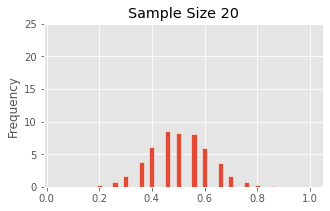

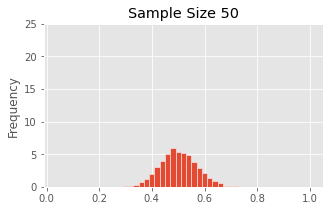

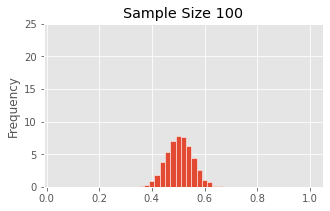

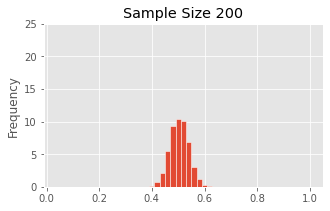

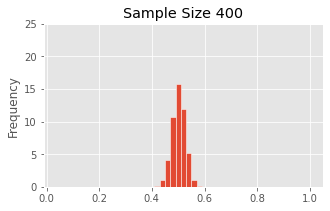

In [18]:
bins = np.arange(-0.01, 1.05, 0.02)

for sample_size in np.array([2, 5, 10, 20, 50, 100, 200, 400]):
    bpd.DataFrame().assign(**{'Sample_Size:{}'.format(sample_size) : simulate_sample_n(sample_size)}) \
                   .plot(kind='hist', density=True, ec='w', bins=bins, 
                         title=f'Sample Size {sample_size}', legend=None, figsize=(5, 3));
    plt.xlim(-0.01, 1.05)
    plt.ylim(0, 25);

You can see that even for samples of size 10, the distribution of sample proportions looks roughly bell-shaped. When we increase the sample size to 50, the resulting distribution looks quite bell-shaped. Note also that as the sample sizes increases, the distributions of sample proportions become narrower.

Now we will test the second claim of the CLT: that the SD of the distribution of the sample mean is the SD of the original distribution, divided by the square root of the sample size.

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Below, we will read in a dataset of Airbnb prices in Manhattan, New York 🏙️🚕. We'll treat this DataFrame as our population, and we'll take samples directly from it. We've computed the standard deviation of the Airbnb prices for you; you will need to use it in the next question.

In [19]:
airbnb_pop = bpd.read_csv('data/airbnb.csv')
airbnb_pop

,price,location
0,225,Midtown
1,200,Murray Hill
2,79,Hell's Kitchen
3,150,Chinatown
4,135,Upper West Side
...,...,...
10323,120,Midtown
10324,75,Financial District
10325,110,Upper West Side
10326,150,Lower East Side


In [20]:
airbnb_pop_std = np.std(airbnb_pop.get('price'))
airbnb_pop_std

178.13451354925638

**Question 2.2.** Write a function called `predict_sd` that takes in a sample size `n`. It returns the predicted standard deviation (according to the CLT) of the sample mean's distribution, for samples of size `n` taken from the Airbnb price data.

*Hint*: **Do not** use or modify your code from `simulate_sample_n`.

In [21]:
def predict_sd(n):
    sdsm = (airbnb_pop_std)/(np.sqrt(n))
    return sdsm

predict_sd(10)

56.33107927017749

In [22]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Write a function called `empirical_sd` that takes in a sample size `n`, draws 1,000 samples of size `n` from the Airbnb prices data set with replacement, and returns the **standard deviation of the distribution of the sample means** of those 1,000 samples.

*Hint*: This function will be similar to the `simulate_sample_n` function you wrote earlier.

In [23]:
#Always take the mean while appending for sample means

In [24]:
def empirical_sd(n): 
    sample_means = []
    for i in range(1000):
        sample = (airbnb_pop.get('price')).sample(n, replace = True)
        sample_means.append(sample.mean())
        
    return np.std(sample_means)

In [25]:
grader.check("q2_3")

q2_3 results: All test cases passed!

The cell below will plot the predicted SDs (computed by your `predict_sd` function) and empirical SDs (computed by your `empirical_sd` function) for various sample sizes. It may take a few moments to run.

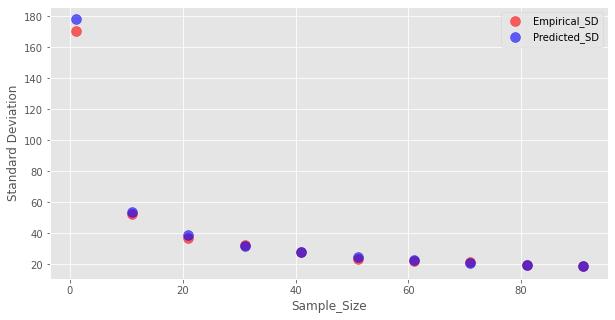

In [26]:
sd_df = bpd.DataFrame().assign(Sample_Size = np.arange(1, 101, 10))
predicted = sd_df.get('Sample_Size').apply(predict_sd)
empirical = sd_df.get('Sample_Size').apply(empirical_sd)
sd_df = sd_df.assign(Predicted_SD = predicted, Empirical_SD = empirical)
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Empirical_SD',label='Empirical_SD', color='red', alpha=0.6, s=100, figsize=(10, 5));
ax = sd_df.plot(kind='scatter',x='Sample_Size', y='Predicted_SD',label='Predicted_SD', color='blue', alpha=0.6, s=100, ax=ax)
ax.set_ylabel('Standard Deviation');

It appears that the formula $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$ matches what we see in practice!

## 3. Pineapple on Pizza 🍍🍕

Whether or not pineapple belongs on pizza has been a topic of heated debate among pizza enthusiasts worldwide. This controversial topping elicits strong opinions from both its supporters and haters. According to a survey conducted by [Mashed](https://www.mashed.com/284583/survey-reveals-how-many-people-actually-love-pineapple-on-their-pizza/), a popular food lovers' website, only 11% of respondents declared pineapple as their go-to pizza topping.

<img src='images/pizza.jpeg' width='300'>

Anthony, an absolute pineapple on pizza lover at UCSD, wasn't happy by this survey and wanted to see if fellow UCSD students agreed with this survey's results. He polled a uniform random sample of all 41,885 UCSD students, and determined that, out of the 580 randomly sampled students, 377 said that pineapple was **not** their go-to pizza topping.

In [27]:
# Run this cell, but don't change it.
survey = bpd.DataFrame().assign(
    Opinion=np.array(["Disgree", "Agree"]),
    Count=np.array([203, 377]))
sample_size = survey.get("Count").sum()
survey_results = survey.assign(
    Proportion=survey.get("Count") / sample_size)
survey_results

,Opinion,Count,Proportion
0,Disgree,203,0.35
1,Agree,377,0.65


Next, he used 1,000 bootstrap resamples to compute a confidence interval for the proportion of all UCSD students who agreed that pineapple wasn't their go-to pizza topping.  Run the next cell to see the empirical distribution of `'Agree'` proportions in the 1,000 resamples.

Note that we're using `np.random.multinomial` to do the resampling here, since each element of the resample is either 1 (agree) or 0 (disagree) with known probabilities. This accomplishes the same thing as using `.sample` with `replace=True`, but is much faster.

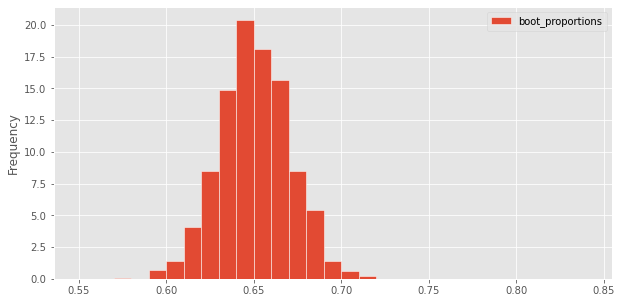

In [28]:
boot_proportions = np.array([])
for i in np.arange(1000):
    resample = np.random.multinomial(sample_size, survey_results.get('Proportion')) / sample_size
    boot_proportions = np.append(boot_proportions, resample[1])
bpd.DataFrame().assign(boot_proportions = boot_proportions).plot(kind='hist', density=True, ec='w', bins=np.arange(0.55, 0.85, 0.01), figsize=(10,5));

Recall, the Central Limit Theorem says

$$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

Furthermore, in any collection of numbers where the only unique values are 0 and 1, there is a simple formula for the standard deviation of the collection:

$$\text{SD of Collection of 0s and 1s} = \sqrt{(\text{Proportion of 0s in Collection}) \times (\text{Proportion of 1s in Collection})}$$

Note that samples and populations are both possible examples of "collections." 

(You're not responsible for deriving this formula, but if you're curious, it's possible to do so just by using the definition of standard deviation and a little algebra!)

**Question 3.1.**
**Without accessing the data in `boot_proportions` in any way**, compute an approximation of the standard deviation of the array `boot_proportions` and assign it to the variable `approximate_sd`.

Instead of using `boot_proportions` directly, use **both** the Central Limit Theorem and the standard deviation formula above. Since you don't know the true proportions of 0s and 1s in the population, use the proportions in the sample instead (since they're likely to be similar).

In [29]:
#SD collection of 0 and 1 is Population SD

In [30]:
approximate_sd = (np.sqrt((0.35)*(0.65)))/(np.sqrt(580))
approximate_sd

0.019805084683240937

In [31]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** Compute the actual standard deviation of the array `boot_proportions`. Your answer should be close to your answer from Question 3.1.

In [32]:
#Just do np.std without any further steps

In [33]:
# exact_sd = np.std(boot_proportions))/(np.sqrt(len(boot_proportions)))
# exact_sd

In [34]:
exact_sd = np.std(boot_proportions)
exact_sd

0.02015539482488418

In [35]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3.**
**Still without accessing `boot_proportions` in any way**, compute an approximate 95% confidence interval for the proportion of students that agreed that pizza is not their go-to pizza topping. The cell below `grader.check("q3_3")` draws your interval in gold below the histogram of `boot_proportions`; use that to verify that your answer looks right.

*Hint*: In the past, we've used `np.percentile` on the array of bootstrapped estimates to find the bounds for the confidence interval. Now, **we're not allowed to use the bootstrapped distribution**, so we can't do it that way. But we don't need to! The Central Limit Theorem tells us that the distribution of the sample mean is normal with a certain standard deviation. We also know that 95% of the area of the normal distribution falls within a certain number of standard deviations from the mean.

In [36]:
# Minus or add from the proportion that agree the (z score multiplied by the approxiamted standard deviation)

In [37]:
lower_limit = 0.65 - (1.96 * approximate_sd)
upper_limit = 0.65 + (1.96 * approximate_sd)

# Your interval is:
[lower_limit, upper_limit]

[0.6111820340208478, 0.6888179659791522]

In [38]:
grader.check("q3_3")

q3_3 results: All test cases passed!

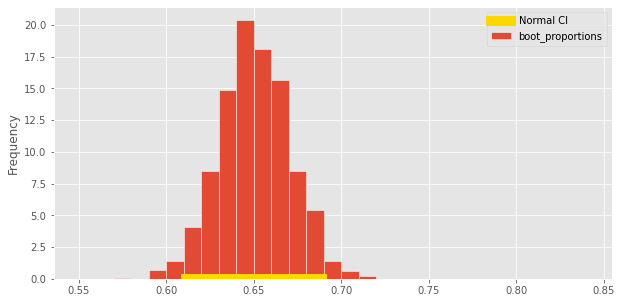

In [39]:
# Run this cell to plot your confidence interval.
bpd.DataFrame().assign(boot_proportions = boot_proportions).plot(kind='hist', density=True, ec='w', bins=np.arange(0.55, 0.85, 0.01), figsize=(10, 5));
plt.plot([upper_limit, lower_limit], [0, 0], color='gold', linewidth=10, label='Normal CI');
plt.legend();

Your confidence interval should make it clear that we're pretty confident that more than half of the students agreed that pineapple isn't their go-to pizza topping. This makes sense, as the proportion of `'Disagree'` opinions in the sample was only 0.35. Anthony is not pleased about this.

Anthony is considering redoing the survey with a larger sample to estimate the population proportion of `'Agree'` opinions with greater precision. He would be happy if the **standard deviation of the distribution of the sample mean were 0.005** (or less).  He'll need to take a new sample that's large enough to achieve that. Polling is time-consuming, so the sample also shouldn't be bigger than necessary.

Instead of making the conservative assumption that the population standard deviation is 0.5 (the largest possible SD of a collection of 0s and 1s), he decides to assume that it's equal to the standard deviation of his first sample. That is,

$$\text{Population SD} \approx \text{Sample SD} = \sqrt{(\text{Proportion of 0s in Sample}) \times (\text{Proportion of 1s in Sample})}$$

Under that assumption, he computes the smallest sample size necessary in order to be confident that the standard deviation of the distribution of the sample mean is at most 0.005.

**Question 3.4.**
What sample size did he find? Assign your answer to the variable `new_sample_size`, which should be of type `int`.

Use the fact that $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$

*Hints*:
- There is only one unknown in the equation above.
- Think about how you should round your answer to satisfy the constraints of the problem.

In [40]:
# 0 and 1 population SD / SD Dist is 0.005 squared

In [41]:
new_sample_size = int(((np.sqrt((0.35) * (0.65)))/0.005)**2)
new_sample_size

9100

In [42]:
grader.check("q3_4")

q3_4 results: All test cases passed!

**Question 3.5.** Suppose Anthony wants to be even more precise and take a sample of sufficient size such that the standard deviation of the sample mean distribution is 0.001. Is it possible for him to do this? Choose the best answer and explanation, then assign `q3_5` to either 1, 2, 3, or 4.

1. No, the sample size required to reach that sample mean standard deviation is larger than the number of students at UCSD.
2. Yes. He can repeat the sample again until he comes across a sample with a standard deviation of 0.001.
3. Yes. Since the 0.001 is a fifth of 0.005, the required sample size is a fifth of `new_sample_size`.
4. Yes. Since the 0.001 is a fifth of 0.005, the required sample size is five times `new_sample_size`.


In [43]:
q3_5 = 1

In [44]:
grader.check("q3_5")

q3_5 results: All test cases passed!

## 4. Key Concepts 🔑

**Question 4.1.** How do we convert the value 37 to standard units if it comes from a data set where the mean is 30 and the standard deviation is 5? Assign `q4_1` to either 1, 2, 3, or 4.



1.
$\dfrac{30-37}{5}$

2.
$\dfrac{({30-37})^2}{5}$

3.
$\dfrac{{37-30}}{\sqrt{5}}$

4.
$\dfrac{37-30}{5}$

In [45]:
q4_1 = 4

In [46]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2.** According to Chebyshev's inequality, for any data set, at least half of the data falls within how many standard deviations of the mean? Assign the **smallest** correct answer to `q4_2`.

1. 1.35
2. 1.40
3. 1.45
4. 1.50

In [47]:
q4_2 = 2

In [48]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 4.3.** Assign `q4_3` to a **list** of all statements below that are **always** true.



1. An empirical histogram of the sample mean of a large random sample drawn with replacement from a population will be roughly normal.
2. An empirical histogram of the sample median of a large random sample drawn with replacement from a population will be roughly normal.
3. If we know the mean and SD of a distribution, we can calculate a 68% confidence interval by stepping out one standard deviation from the mean in either direction.
4. For any distribution, 95% of the data falls within two standard deviations of the mean.
5. For any distribution, at least 95% of the data falls within five standard deviations of the mean.

In [49]:
q4_3 = [1, 3, 5]

In [50]:
grader.check("q4_3")

q4_3 results: All test cases passed!

**Question 4.4.** Consider drawing a large random sample with replacement from some population. Let $x$ be the sample size such that the standard deviation of the distribution of sample means is 10. What sample size is required to guarantee that the standard deviation of the distribution of sample means is no more than 5? Assign `q4_4` to either 1, 2, 3, or 4.

1. $2x$
2. $4x$
3. $6x$
4. $8x$

In [51]:
q4_4 = 2

In [52]:
grader.check("q4_4")

q4_4 results: All test cases passed!

## Finish Line 🏁

Congratulations! You are done with Homework 6 – the final homework of the quarter! 🎉

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
1. Read through the notebook to make sure everything is fine and all tests passed.
1. Run the cell below to run all tests, and make sure that they all pass.
1. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.
1. Stick around while the Gradescope autograder grades your work. Make sure you see that all tests have passed on Gradescope.
1. Check that you have a confirmation email from Gradescope and save it as proof of your submission.

In [54]:
grader.check_all()

q1_1 results:
    q1_1 - 1 result:
        Trying:
            isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
        Expecting:
            True
        **********************************************************************
        Line 1, in q1_1 0
        Failed example:
            isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1_1 0[0]>", line 1, in <module>
                isinstance(city_means, bpd.DataFrame) and set(city_means.columns) == set(['Price(BAM)'])
            NameError: name 'city_means' is not defined

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases